# **Introduction to Data Analysis and Visualization with Pandas for Biological Data**

## Tutorial for participants of PyCon PL 2023
------------------
#### Tutors:
* **Lidia Lipińska-Zubrycka** (University of Warsaw)
* **Igor Zubrycki** (Lodz University of Technology / MarketLab)

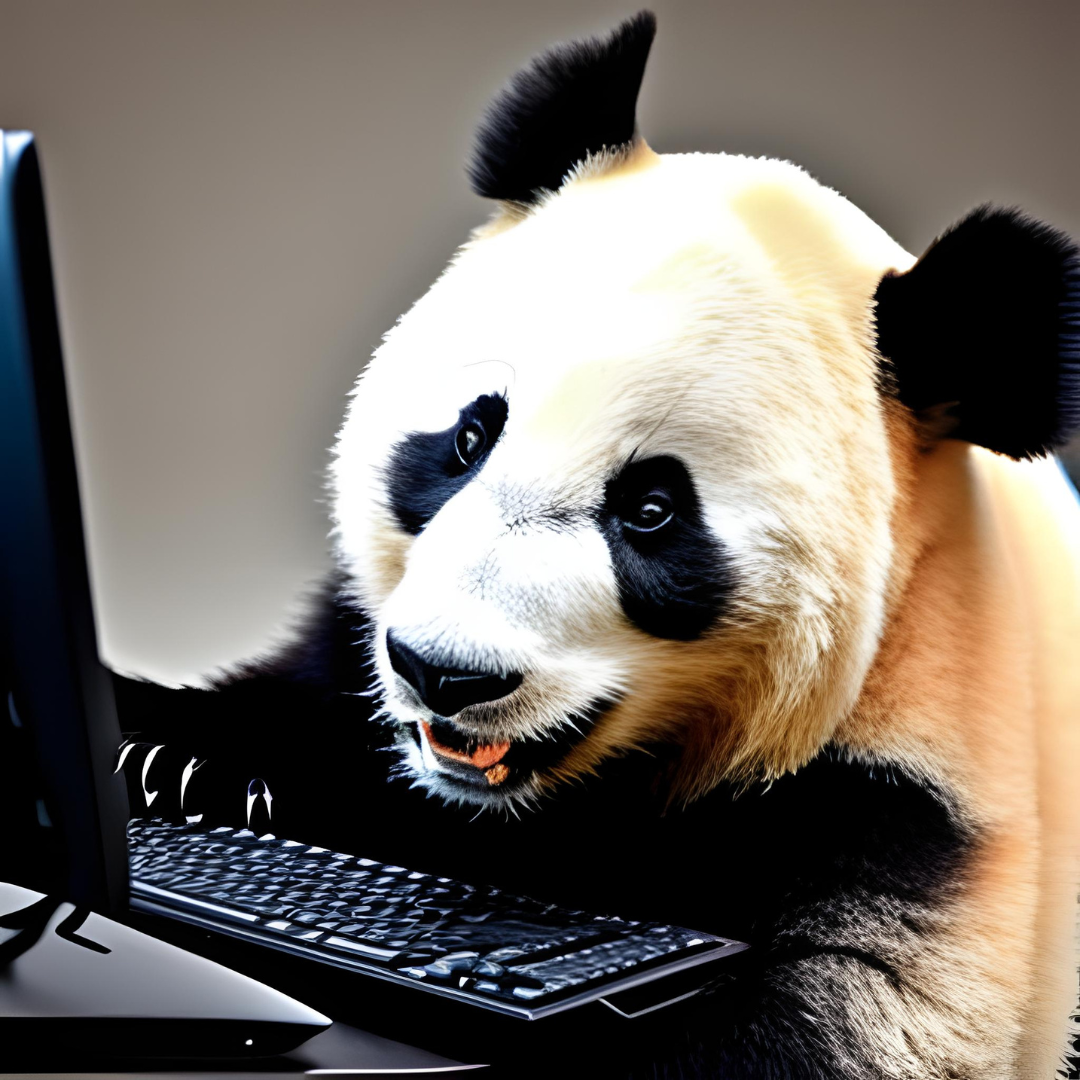

## Pandas - introduction
**Pandas** is a powerful and flexible open-source data analysis and manipulation library for Python. It provides data structures and functions needed to manipulate structured data, including functionality for manipulating and analyzing numerical tables and time series data.

#### Key features of pandas include:


*   **DataFrame object**: This is a flexible container for lower dimensional data designed to work with a variety of data types, such as floating point and string values, and more. It is similar to a spreadsheet or SQL table and is the object most commonly used in data manipulation tasks.

*   **Data alignment and integrated handling of missing data**: Pandas automatically aligns data in calculations, and it has excellent support for missing data handling.

*   **Reshaping and pivoting of data sets**: Functions like pivot allow users to arrange data in a format suitable for analysis.

*   **Label-based slicing, indexing and subsetting of large data sets**: Tools like loc and iloc make data selection simpler.

*   **Columns can be inserted and deleted from data structures for size mutability**: This allows you to easily modify your DataFrame by adding or removing columns.

*   **Group by functionality**: This allows you to group your data and perform operations on the groups.

*   **High performance merging and joining of data sets**: Functions like merge and join allow you to combine data from multiple sources effectively.

*   **Time series functionality**: Date range generation, frequency conversion, moving window statistics, date shifting and lagging, etc.

*   **Data I/O**: Easy to read and write data in various formats like CSV, Excel, SQL databases, and even HDF5 format.



The library's name, "pandas," is derived from "panel data", a term borrowed from econometrics to describe multi-dimensional structured data sets. The library is highly optimized for performance, with critical code paths written in Cython or C.

## Import libraries

In addition to Pandas, which is not part of the Python standard library, we must import other necessary libraries for data manipulation, visualization, and scientific computation. These include NumPy, Seaborn, and Matplotlib. We instruct Python to load these libraries with the following code:

### Install dependancies

In [ ]:
!pip install -r requirements.txt


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

The %matplotlib inline directive is used specifically in Jupyter notebooks, allowing us to see plots or graphs within the notebook itself, directly below the code cells that produce them. This makes for an interactive visually-oriented coding experience.


## Getting help about Pandas functions

*   Using the pandas documentation [link text](https://pandas.pydata.org/pandas-docs/stable/)
*   Asking Chat GDP for help
*   Using the help() function
*   Using the ? operator



In [ ]:
# Examples
help(pd.DataFrame)

In [ ]:
pd.read_csv?

## Pandas DataFrame - how to create/import it?

A **DataFrame** is a two-dimensional data structure in pandas, similar to a table in a relational database. There are several ways to create a DataFrame. Here are a few common methods:



In [ ]:
# From a Dictionary of Arrays, Lists, or Tuples: Each dictionary key will become a column in the DataFrame, and each corresponding value will become a row.


data = {"name": ["John", "Anna", "Peter"], "age": [28, 24, 35]}
df = pd.DataFrame(data)
df.head()

In [ ]:
# From a List of Dictionaries: Each dictionary represents a row of data. The dictionary keys correspond to the column labels, and the values correspond to the data in each cell of the row.

data = [{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6, "d": 7}]
df = pd.DataFrame(data)
df.head()

In [ ]:
# From a List of Lists (Nested List): Each inner list represents a row. Optionally, you can add the columns parameter to specify column names.

data = [[1, 2, 3], [4, 5, 6]]
df = pd.DataFrame(data, columns=["a", "b", "c"])
df.head()

In [ ]:
# From a NumPy Array:  This works similarly to the nested list method.

import numpy as np

data = np.array([[1, 2, 3], [4, 5, 6]])
df = pd.DataFrame(data, columns=["a", "b", "c"])
df.head()

In [ ]:
# From other Pandas Data Structures: You can also convert a pandas Series structure into a DataFrame.

s = pd.Series([1, 2, 3, 4, 5], index=["a", "b", "c", "d", "e"])
df = s.to_frame()
df.head()

## ***Exercise:***
Now prepare in Pandas a new DataFrame named df, where you include your favorite animals and their names

In [83]:
# Example

,Animal,Name
0,Dog,Rex
1,Cat,Whiskers
2,Bird,Tweetie
3,Lion,Simba


In [ ]:
# Place for your code

### How to save and read data in csv file

In [ ]:
# Save file to csv

df.to_csv("data.csv", index=False)

In [ ]:
!ls

In [ ]:
# From a CSV File: You can read data from a CSV file using pd.read_csv(). The result is a DataFrame.

df = pd.read_csv("data.csv")
df.head()

# Dataset 1:  Breast cancer dataset

## Description of dataset
The results show data obtained from a breast tumor biopsy along with the diagnosis: malignant or benign form of cancer.


**Features:**

1. ID number
2. Diagnosis (M = malignant (złośliwy), B = benign (łagodny))

**Ten real-valued features are computed for each cell nucleus:**

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


Source:: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
# Download DataFrame from GitHub
!wget https://raw.githubusercontent.com/lidkalee/PyConPL23_Pandas/master/breast_cancer_diagnostic_data.csv


In [ ]:
# Read_csv
cancer_data = pd.read_csv("breast_cancer_diagnostic_data.csv")

## Pandas provides a variety of ways to view and inspect your data

In [ ]:
# head(): This function returns the first n rows of your DataFrame. By default, it shows the first 5 rows.
cancer_data.head()

In [ ]:
# tail(): This function returns the last n rows of your DataFrame. 
# Like head(), it shows the last 5 rows by default.
cancer_data.tail()

In [ ]:
# info(): This method provides a concise summary of the DataFrame including the number 
# of non-null values in each column, and the datatype of each column.
cancer_data.info()

In [ ]:
# dtypes: This attribute returns the datatypes of each column.
cancer_data.dtypes

In [ ]:
# describe(): This function provides descriptive statistics that summarize the central tendency,
# dispersion, and shape of a dataset’s distribution, excluding NaN values.
cancer_data.describe()

In [ ]:
# shape: This attribute returns a tuple representing the dimensionality of the DataFrame (rows, columns).
cancer_data.shape

In [ ]:
# columns: This attribute returns the column labels of the DataFrame.
cancer_data.columns

**loc and iloc**: These two attributes allow you to access groups of rows and columns in a DataFrame. 
loc is label-based, which means you have to specify the name of the rows and columns that you need to filter out. On the other hand, iloc is integer index-based, so you have to specify rows and columns by their integer index.

In [ ]:
# Prints the first row
print(cancer_data.loc[0]) 
# print(cancer_data.iloc[0])  # Also prints the first row

## Data exploration

In [ ]:
## How many patients have been diagnosed with malignant and how many with benign tumors?
cancer_data["diagnosis"].value_counts()

## ***Exercise:***
What part of the examined patients have been diagnosed with a malignant tumor and how many with a benign one? Hint: the value_counts() function has a 'normalize' parameter which is False by default. Let's try to change it.

In [ ]:
# Place for your code


In [ ]:
# PS. You can ask for help 

#help(pd.Series.value_counts)

## Different methods of subsetting rows and/or columns.

Pandas provides several methods for indexing rows and/or columns. Here are some common techniques:

* Selection by Label (**df.loc[ ]**): loc is primarily label-based indexing. It can accept single labels, lists of labels, slices of labels, boolean arrays, or a callable function with one argument.



```
df.loc[row_label, column_label]  # Single row, single column
df.loc[row_label, :]  # Single row, all columns
df.loc[:, column_label]  # All rows, single column
df.loc[[row_label1, row_label2], [column_label1, column_label2]]  # Multiple rows and columns
```

* Selection by Position (**df.iloc[ ]**): iloc is primarily integer-based indexing. It can accept integers, lists of integers, slices of integers, boolean arrays, or a callable function with one argument.


```
df.iloc[row_index, column_index]  # Single row, single column
df.iloc[row_index, :]  # Single row, all columns
df.iloc[:, column_index]  # All rows, single column
df.iloc[[row_index1, row_index2], [column_index1, column_index2]]  # Multiple rows and columns
```

* **Boolean Indexing**: This type of indexing is used when we want to filter rows from a DataFrame based on a certain condition.



```
df[df['column_label'] > value]  # Rows where the column is greater than value
df[(df['column_label1'] > value1) & (df['column_label2'] < value2)]  # Applying multiple conditions
```
* **Using df.at[ ]** and df.iat[ ]: For getting or setting a single value from a DataFrame. at uses label-based indexing and iat uses integer-based indexing.



#### Subsetting columns

In [ ]:
## Subsetting columns by name
cancer_data["diagnosis"]

In [ ]:
# Another option
cancer_data.diagnosis


In [ ]:
# Another option and another method.
# Here we create subset of data taking all rows ":", and one column "diagnosis"

cancer_data.loc[:,'diagnosis']

In [ ]:
# Example of preparation of subset DataFrame using df.loc["rows", 'columns']
df_subset = cancer_data.loc[0:4,'id':'diagnosis']
df_subset.head()

In [ ]:
## Metod to select specific columns and prepare subset of DataFrame
cancer_subset1 = cancer_data[["id", "diagnosis", "radius_mean"]]
cancer_subset1.head()

In [ ]:
# Check the information of a given patient ('id' column)

cancer_data.iloc[1]

In [ ]:
cancer_data.iloc[5:8]  # 8th row is not included

## ***Exercise:***
Use one of the methods above to create an object containing only the 'id' column from the cancer_data table, and check what type of object it is.

In [ ]:
# Place for your code


## Boolean subsetting DataFrame
Boolean subsetting is a powerful technique in pandas that allows you to select or exclude data from a DataFrame based on its values.

To use Boolean subsetting, you create a condition that generates a Boolean Series, with True and False values corresponding to rows in the DataFrame. You then use this Series to index the DataFrame, and pandas will return only the rows where the Series is True.


In [ ]:
# Only rows with patients with diagnosis "M"
cancer_data_M = cancer_data[cancer_data["diagnosis"] == "M"]
cancer_data_M.head()

In [ ]:
# Only rows with "area_mean" column > 100
cancer_data_area_above_100 = cancer_data[cancer_data["area_mean"] > 1000]
cancer_data_area_above_100.head()

In [ ]:
#  rows with patients diagnosed as "M" AND with "area_mean" > 100
both_df = cancer_data[(cancer_data["diagnosis"] == "M") & (cancer_data["area_mean"] > 1000)]
both_df.head()

In [ ]:
#  rows with patients diagnosed as "M" OR with "area_mean" > 100
either_or_df = cancer_data[(cancer_data["diagnosis"] == "M") | (cancer_data["area_mean"] > 1000)]
either_or_df.head()

## ***Exercise:***
Let's create a subset of cancer_data consisting of patients diagnosed with 'B' for benign cancer, and who have a 'perimeter_mean' above 120. What stands out in this result? Now, let's compare this subset with the data for patients diagnosed with malignant cancer ('M'). Do you observe any differences

In [ ]:
# Place for your code


In [ ]:
# Place for your code 



## Drop columns or rows
* **Dropping columns**:
To drop one or more columns from a DataFrame, you can use the following syntax:


```
df.drop(['column_name1', 'column_name2'], axis=1)
```
Here, 'column_name1' and 'column_name2' are the names of the columns you want to drop. axis=1 specifies that you want to drop columns.

* **Dropping rows**:
To drop one or more rows from a DataFrame, you can use:


```
df.drop([index1, index2], axis=0)
```
Here, 'index1' and 'index2' are the indices of the rows you want to drop. axis=0 specifies that you want to drop rows.

In both cases, the drop() function doesn't modify the original DataFrame but returns a new one. If you want to modify the original DataFrame, you can use the **inplace=True** argument:


```
df.drop(['column_name'], axis=1, inplace=True)
df.drop([index], axis=0, inplace=True)
```
Replace 'df' with your DataFrame's name, 'column_name1', 'column_name2' with the names of the columns you want to drop, and 'index1', 'index2' with the indices of the rows you want to drop.




In [ ]:
# Drop rows from the DataFrame.

cancer_data.drop(5, axis=0) # axis=0 rows

In [ ]:
# Drop columns 'id' and 'diagnosis', and save it as a new_df. Inspect the result

new_df = cancer_data.drop(columns=['id', 'diagnosis'])
new_df.head()

In [ ]:
# Drop several lines (4-90) from DataFrame by index

cancer_data.drop(range(4, 90), axis=0)

In [ ]:
# Select slices of rows and columns simultaneously by their index
# left side of the comma concerns row indexes (slice lines 40 to 100)
# rigth side of the comma concerns column indexes (slice col 4 to 20)

cancer_data.iloc[40:100, 4:20]

In [ ]:
# Drop columns containing missing values (Nan)

cancer_data.dropna(axis=1)

In [ ]:
# Drop lines containing missing values (Nan)
cancer_data.dropna(axis=0)

# Did you find any lines containing missing values?

### **Excercise**
Prepare new DataFrame called cancer_data_subset, containing first 11 columns of original DataFrame. Hint: You can do it using several methods. For example, you can check column names with df.column and drop selected columns.


In [ ]:
# Place for your code


## Renaming columns or rows
Renaming columns or rows in a pandas DataFrame can be accomplished using the rename() function. Here's how:

**Renaming columns**:


```
df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
```
In the above line, old_name1 and old_name2 are the old column names and new_name1 and new_name2 are the new column names. The argument inplace=True makes the changes in the original DataFrame.

**Renaming rows:**



```
df.rename(index={old_index1: new_index1, old_index2: new_index2}, inplace=True)
```
In the above line, old_index1 and old_index2 are the old row labels (indices) and new_index1 and new_index2 are the new labels. Again, inplace=True makes the changes in the original DataFrame.

**Using a function to change column or index names:**
If you want to apply the same transformation to all column or index names, you can pass a function instead of a dictionary to rename. For example, to make all column names uppercase:


```
df.rename(columns=str.upper, inplace=True)
```

In this case, the function str.upper is applied to each column name.

Replace df with your DataFrame's name, old_name1, old_name2, new_name1, new_name2, old_index1, old_index2, new_index1, and new_index2 with the appropriate names and indices for your DataFrame.










In [ ]:
## If you were unable to prepare the dfataframe subset in the previous step, then run this code.
# We will need this

list_col = list(cancer_data.columns)[:12]
cancer_data_subset = cancer_data[list_col]
cancer_data_subset.head()

In [ ]:
# Let's list the columns of subset DataFrame
cancer_data_subset.columns

In [ ]:
# Assign new column names  - we just don't want the description obout that is the mean value
cancer_data_subset.columns = ['id',    "diagnosis",    "radius",
    "texture",  "perimeter", "area",
    "smoothness",   "compactness", "concavity",
    "concave points", "symmetry", "fractal_dimension"
]

# and we have our new table
cancer_data_subset.head()

## DataFrame reshaping
There are several methods to reshape a pandas DataFrame. Here are a few commonly used methods:

* **Pivot**: This is used to reshape data (produce a "pivot" table) based on column values. It uses unique values from specified index / columns to form axes of the resulting DataFrame.

```
df.pivot(index='column1', columns='column2', values='column3')
```
* **Melt**: This is used to unpivot a DataFrame from wide format to long format, optionally leaving identifiers set.

```
df.melt(id_vars=['column1', 'column2'], value_vars=['column3', 'column4'])
```

* **Stack**: This is used to "compress" a level in the DataFrame's columns to produce either:
    * A Series (if the columns have a single level).
    * A DataFrame (if the columns have multiple levels).

```
df.stack()
```

* **Unstack**: This method is used to "expand" a level in the DataFrame's columns to produce a new DataFrame.

```
df.unstack()
```
* **Pivot Table**: This is a generalization of pivot that can handle duplicate values for one index/column pair.

```
df.pivot_table(values='column3', index='column1', columns='column2', aggfunc='mean')
```

Remember, the reshaping method you use will depend on what your current data looks like and what you want it to look like.



In [ ]:
## Reshape the table
# melting the dataframe
melted_df = cancer_data_subset.melt(id_vars="diagnosis",  
                             value_vars=[ "radius", "texture", "perimeter", "area", "smoothness",
                                         "compactness", "concavity", "concave points", "symmetry",
                                         "fractal_dimension" ],  var_name="name1_?",
                               value_name="name2_?")

# now melted_df contains the columns 'diagnosis', 'parameter', and 'value'
melted_df.head()

### **Excercise**
Copy and modify previous code to change the names of 'name1_?' and 'name2_?' with 'parameter' and 'value'. Remove all rows with value 'area' in 'parameter column. Visualise data with violinplot.

In [ ]:
# Place for your code


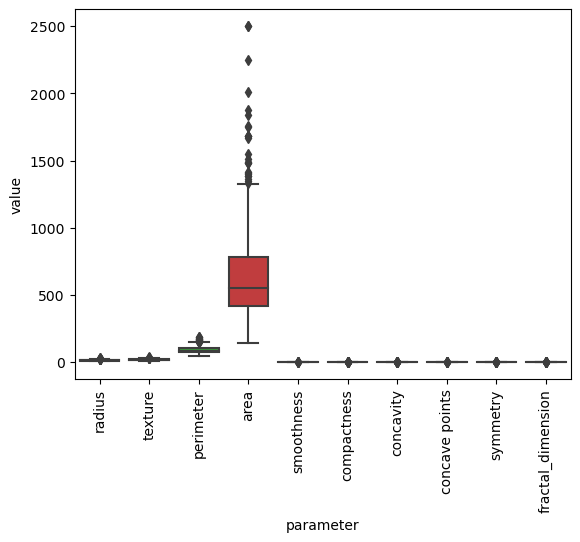

In [84]:
# Visualise data with seaborn - sns.violinplot()
import seaborn as sns
sns.boxplot(data = melted_df, x = 'parameter', y = 'value') # Try to setup showfliers=False
plt.xticks(rotation =90);

## Main operations

In [ ]:
# check the mean of a given column
cancer_data_subset["radius_mean"].mean()

In [ ]:
# check the maximum or the minimum value of a given column
cancer_data_subset["radius_mean"].max(), cancer_data_subset["radius_mean"].min()

In [ ]:
# count number of elements of a given column
cancer_data_subset["radius_mean"].count()

In [ ]:
# sum all values in a given column
cancer_data_subset["radius_mean"].sum()

In [ ]:
# check the mean value of each column on the table
cancer_data_subset.mean()

In [ ]:
# check the mean value of each line on the table
cancer_data_subset.mean(axis=1)

In [ ]:
# if we define this as a new parameter (dummy_col)
dummy_col = cancer_data_subset[["radius_mean", "perimeter_mean", "area_mean"]].sum(
    axis=1
)

# we can add it to our table using the assign function
# sets the column name (string) and the variable that goes with it
cancer_data_subset.assign(new_col=dummy_col)

### **Excercise**
Prepare a subset of data containing only rows with 'area_mean' higher than average 'area_mean'. Please check the frequency of patients with malignant and benign diagnosis for the patents with 'area' above mean value.

In [ ]:
# Place for your code


### Replacing values in column

In [ ]:
# to replace values by other values dynamically we can use replace function
# to replace 'M' and 'B' by the full word 'Malign' and 'Benign', respectively:

cancer_data_subset["diagnosis"].replace(
    to_replace=["M", "B"], value=["Malign", "Benign"], inplace=True
)
cancer_data_subset

# Data Visualisation

In [ ]:
## Boxplot

sns.boxplot(data=melted_df, x="parameter", y="value", hue="diagnosis")

In [ ]:
## Boxenplot

sns.boxenplot(data=melted_df, x="parameter", y="value", hue="diagnosis")

In [ ]:
## Violinplot

sns.violinplot(data=melted_df, x="parameter", y="value", hue="diagnosis")

In [ ]:
# Histogram
hist = sns.distplot(cancer_data["area_mean"])
hist.set_title("Mean area Histogram")
hist.set_xlabel("Area mean")
hist.set_ylabel("Density")
plt.show()

In [ ]:
# scatterplot
sns.scatterplot(data=cancer_data, x="area_mean", y="perimeter_mean", hue="diagnosis")

## ***Exercise:***

Try do visualise another parameters using scatterplot. Can you tell the any difference between patients goup?  

In [ ]:
# Place for your code


In [ ]:
# Heatmap of Pearson correlation of numeric parameters
sns.heatmap(cancer_data_subset.corr());

In [ ]:
# Create pairplot of all numerical data of DataFrame.
# Columns containing categorical data ("diagnosis") can be used as a parameter to group data into classes

sns.pairplot(cancer_data_subset, hue="diagnosis")

## ***Exercise:***
Try to prepare pairplot for smaller subset of data to increase readability of the plot.

In [ ]:
# Place for your code

## PCA analysis
**Principal Component Analysis (PCA)** is a method that reduces the dimensionality of the data set, allowing most of the variability to be explained using fewer variables. Scikit-learn is a powerful Python module for machine learning and it contains function for PCA.

Here is a simple step-by-step guide to perform PCA and plot the results using Python's pandas and scikit-learn libraries:

1. Import necessary libraries:



```
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
```


2. Load and prepare your data: For this example, let's assume you have a DataFrame df with some numerical data you want to perform PCA on.

3. Initialize and fit PCA:
You can initialize a PCA object and fit it to your data like so:



```
pca = PCA(n_components=2) # We are reducing dimensionality to 2
principalComponents = pca.fit_transform(df)
```
**n_components** is the number of principal components you want to reduce your data to.

4. Create a DataFrame with the principal components:



```
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
```

5. Plot the data:



```
plt.figure(figsize=(8,6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.show()
```


This plot will show your data points reduced to 2 dimensions.

Please note that PCA is a complex technique that makes many mathematical assumptions and is not suitable for all types of data. Always make sure that your data meet these assumptions before using PCA or interpret the results with caution.



## ***Exercise:***

Let's try to undergo PCA analysis of the subset of your data. What can you tell about the data based on results of PCA?

In [ ]:
## Place for your code


## For more excercises, lets run [Intro_Pandas_Part2.ipynb](Intro_Pandas_Part2.ipynb)